In [68]:
import numpy as np
import cmath
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
def reciprocal_matrix(k, w, v):

    spatial_plusone = np.array([[0, w],[0, 0]]) # will give conduction band - between N and N+1 cells, will use pbc's 
    spatial_H_ground = np.array([[0, v],[v, 0]]) # will give valence band - inside cell, no pbc's
    spatial_minusone = np.array([[0, 0],[w, 0]]) # will give conduction band - between N-1 and N cells, will use pbc's '''

    H11 = spatial_H_ground[0][0] * cmath.exp(1j * 0 * k) + spatial_plusone[0][0] * cmath.exp(1j * -1 * k) + spatial_minusone[0][0] * cmath.exp(1j * 1 * k)
    H12 = spatial_H_ground[0][1] * cmath.exp(1j * 0 * k) + spatial_plusone[0][1] * cmath.exp(1j * -1 * k) + spatial_minusone[0][1] * cmath.exp(1j * 1 * k)
    H21 = spatial_H_ground[1][0] * cmath.exp(1j * 0 * k) + spatial_plusone[1][0] * cmath.exp(1j * -1 * k) + spatial_minusone[1][0] * cmath.exp(1j * 1 * k)
    H22 = spatial_H_ground[1][1] * cmath.exp(1j * 0 * k) + spatial_plusone[1][1] * cmath.exp(1j * -1 * k) + spatial_minusone[1][1] * cmath.exp(1j * 1 * k)

    return np.array([ [ H11 , H12 ] , [ H21 , H22 ] ])

In [71]:
def berry_phase(w, v):

    space = np.linspace(-np.pi, np.pi, 100)

    eigenvectors = []
    eigenvalues = []

    for i in space:

        M = reciprocal_matrix(i, w, v)
        values, vectors = np.linalg.eigh(M)

        eigenvalues.append(values[0])
        eigenvectors.append(vectors[:,0])

    products = np.array([np.vdot(eigenvectors[i], eigenvectors[(i + 1) % len(eigenvectors)]) for i in range(len(eigenvectors))])

    phi = (-1) * (np.log( np.prod(products) )).imag

    return phi


In [101]:
def phase_space(w_range, v_range, no_points):

    w_space = np.linspace(w_range[0], w_range[1], no_points)
    v_space = np.linspace(v_range[0], v_range[1], no_points)

    C = np.zeros((no_points, no_points))

    for i in range(no_points):
        for j in range(no_points):

            C[i,j] = np.absolute(berry_phase(w_space[i], v_space[j]))

    return C

In [135]:
def plot_phase_space(C):

    sns.color_palette("mako", as_cmap=True)
    sns.set_style("white")

    plt.figure(figsize=(10,6))
    mesh = plt.pcolormesh(C)

    plt.xticks(np.linspace(0, 100, 11), labels=np.round(np.linspace(0, 1, 11), 2))
    plt.yticks(np.linspace(0, 100, 11), labels=np.round(np.linspace(0, 1, 11), 2))

    plt.text(20, 80, 'Topological', fontsize=12, ha='center', color='black')
    plt.text(80, 20, 'Trivial', fontsize=12, ha='center', color='white')

    cbar = plt.colorbar(mesh)
    cbar.set_label('Winding number')

    cbar.set_ticks([0, np.pi])  # Specify ticks
    cbar.set_ticklabels(['$/nu$ = 0', '$/nu = 1$'])

    plt.xlabel('w')
    plt.ylabel('v')
    plt.title('Topological phase space')

In [124]:
test = phase_space([0,1], [0,1], 100)

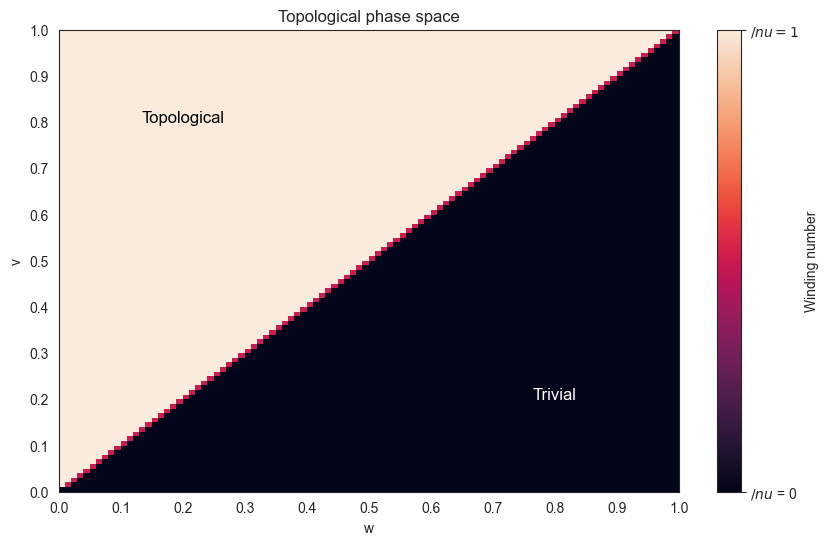

In [136]:
plot_phase_space(test)